In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error,log_loss

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
train=pd.read_csv('train_PDjVQMB.csv')
df_test=pd.read_csv('test_lTY72QC.csv')
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.440000,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.110000,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.060000,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.160000,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.230000,1,1,1,1,Good,1


In [3]:
print('total rows in train:',len(train))
print('total rows in test:',len(df_test))

total rows in train: 6650
total rows in test: 2851


In [4]:
train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

# Missing values

In [5]:
train.isnull().sum()
#No missing values

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

# Categorizing variables and removing non-valuable features

In [35]:
train[['Credit_Card','Transaction_Status','Product_Holdings','Vintage']]=train[['Credit_Card','Transaction_Status','Product_Holdings','Vintage']].astype('object')
df_test[['Credit_Card','Transaction_Status','Product_Holdings','Vintage']]=train[['Credit_Card','Transaction_Status','Product_Holdings','Vintage']].astype('object')
train=train.drop(['ID'],axis=1)
test1=df_test.drop(['ID'],axis=1)
#We can remove ID, since it's not valuable

# EDA and statistics

In [41]:
from statsmodels.stats import weightstats as stests
from scipy import stats
a=train[train['Is_Churn']==1]['Balance']
b=train[train['Is_Churn']==0]['Balance']
stat, p_value = stats.shapiro(train['Balance'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#not normal, hence we will go with non parametric test

#H0: Mean balance of churn=mean balance of non churn, H1: Mean balance of churn!=mean balance of non churn
test = stats.mannwhitneyu(a,b)
print('Test Statistic:',test[0])
print('p_value:',test[1])
#Since p value is less than 0.05, we fail to accept null hypothesis and conclude balance makes a difference in churning

Test statistic: 0.9694454669952393
P-Value: 2.2467584268574727e-35
Test Statistic: 3634297.5
p_value: 3.901697115502177e-06


In [42]:
a=train[train['Is_Churn']==1]['Age']
b=train[train['Is_Churn']==0]['Age']
stat, p_value = stats.shapiro(train['Age'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#not normal, hence we will go with non parametric test

#H0: Mean age of churn=mean age of non churn, H1: mean age  of churn!=mean age  of non churn
test = stats.mannwhitneyu(a,b)
print('Test Statistic:',test[0])
print('p_value:',test[1])
#Since p value is less than 0.05, we fail to accept null hypothesis and conclude age makes a difference in churning

Test statistic: 0.9728818535804749
P-Value: 1.0851392428623631e-33
Test Statistic: 2862118.5
p_value: 3.549905911366895e-59


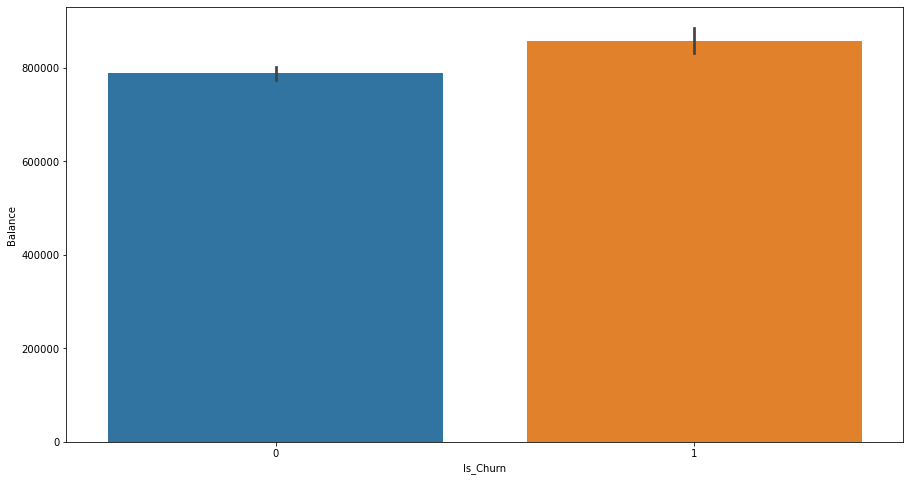

In [45]:
sns.barplot('Is_Churn','Balance',data=train)
plt.show()

In [43]:
#H0: income and churning are dependent, H1: income and churning are independent

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
table = pd.crosstab(train['Income'], train['Is_Churn'])

# observed values  
observed_value = table.values
observed_value

array([[1441,  444],
       [1435,  412],
       [1219,  354],
       [1018,  327]], dtype=int64)

In [44]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to reject null hypothesis and conclude income and churning are independent

Critical value for chi-square test: 7.8147
Test statistic: 2.2987866169421673
p-value: 0.5127533988151645


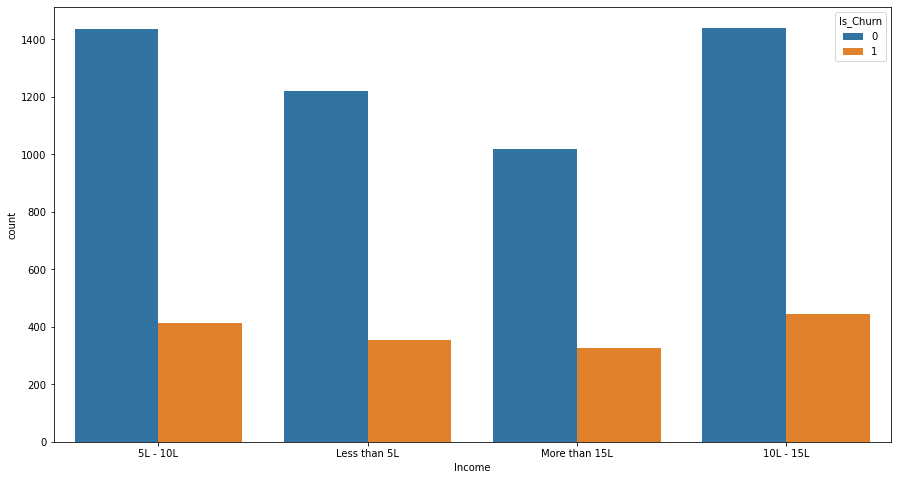

In [46]:
#Income vs churn
sns.countplot('Income',hue='Is_Churn',data=train)
plt.show()
#Income 10L-15L has more churns

In [49]:
#H0: vintage and churning are independent, H1: vintage and churning are dependent

table = pd.crosstab(train['Vintage'], train['Is_Churn'])

# observed values  
observed_value = table.values
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to reject null hypothesis and conclude vintage and churning are independent

Critical value for chi-square test: 11.0705
Test statistic: 10.156752148041022
p-value: 0.07091364326527481


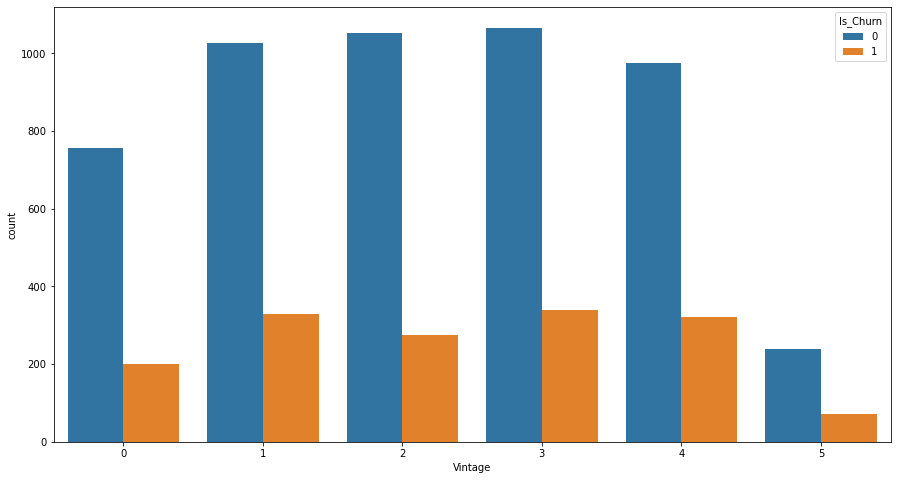

In [47]:
#Vintage vs churn
sns.countplot('Vintage',hue='Is_Churn',data=train)
plt.show()

In [51]:
#H0: Credit_Category and churning are independent, H1: Credit_Category and churning are dependent

table = pd.crosstab(train['Credit_Category'], train['Is_Churn'])

# observed values  
observed_value = table.values
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude Credit_Category and churning are dependent

Critical value for chi-square test: 5.9915
Test statistic: 10.304629564199358
p-value: 0.005785995893842243


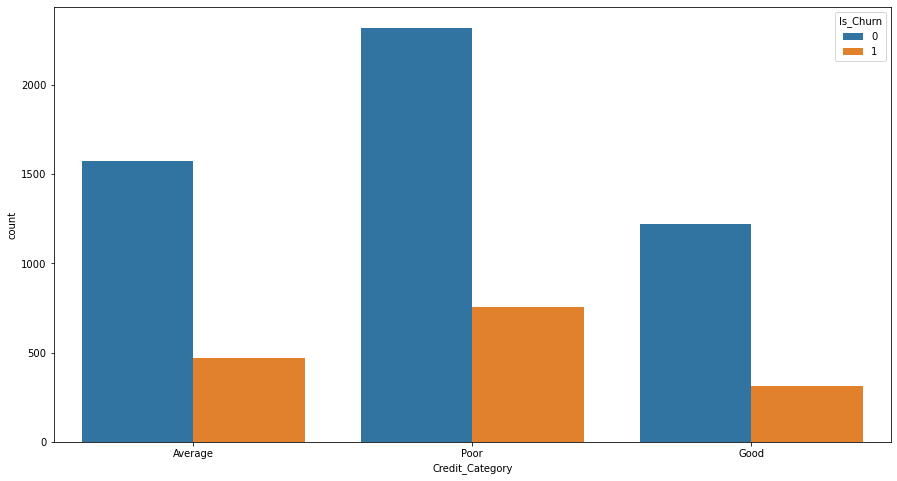

In [53]:
#credit_category vs churn
sns.countplot('Credit_Category',hue='Is_Churn',data=train)
plt.show()
#poor category has more churns

In [57]:
#H0: Credit_Card and churning are independent, H1: Credit_Card and churning are dependent

table = pd.crosstab(train['Credit_Card'], train['Is_Churn'])

# observed values  
observed_value = table.values
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude Credit_Card and churning are independent

Critical value for chi-square test: 5.9915
Test statistic: 0.0047833047862159755
p-value: 0.944861115983124


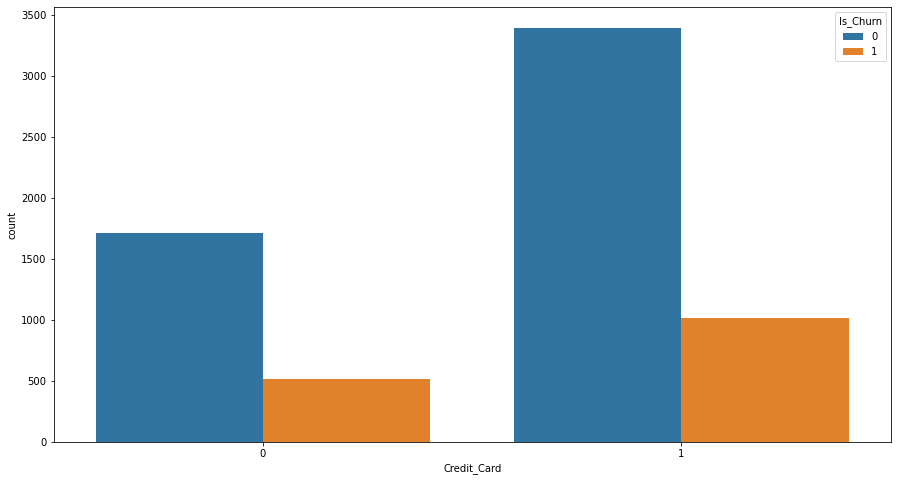

In [56]:
#credit_card vs churn
sns.countplot('Credit_Card',hue='Is_Churn',data=train)
plt.show()
#having a credit card churns

In [58]:
#H0: Gender and churning are independent, H1: Gender and churning are dependent

table = pd.crosstab(train['Gender'], train['Is_Churn'])

# observed values  
observed_value = table.values
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude Credit_Card and churning are dependent

Critical value for chi-square test: 3.8415
Test statistic: 19.097390051725917
p-value: 1.2421463765951643e-05


In [62]:
#H0: Product_Holdings and churning are independent, H1: Product_Holdings and churning are dependent

table = pd.crosstab(train['Product_Holdings'], train['Is_Churn'])

# observed values  
observed_value = table.values
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude Product_Holdings and churning are dependent

Critical value for chi-square test: 5.9915
Test statistic: 7.30475789538985
p-value: 0.025929370731566714


# Scaling Numerical variables

In [8]:
#Train data scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
ss=StandardScaler()
mm=MinMaxScaler()
le=LabelEncoder()
df_train_cat=train.select_dtypes('object')
df_train_num1=train.select_dtypes(np.number).drop('Is_Churn',axis=1)
num21=mm.fit_transform(df_train_num1)
num=pd.DataFrame(num21,columns=df_train_num1.columns)

In [9]:
#Test data scaling
df_test_cat=test1.select_dtypes('object')
df_test_num1=test1.select_dtypes(np.number)
num21test=ss.fit_transform(df_test_num1)
numtest=pd.DataFrame(num21test,columns=df_train_num1.columns)

# Feature Engineering

In [10]:
#train features
#Encoding categorical variables
a=train.select_dtypes('object')
a['Income']=a['Income'].replace(['Less than 5L','5L - 10L','More than 15L'],[1,2,3])
a['Product_Holdings']=a['Product_Holdings'].replace(['1','2','3+'],[1,2,3])
a['Credit_Category']=a['Credit_Category'].replace(['Poor','Average','Good'],[1,2,3])
a['Gender']=a['Gender'].replace(['Female','Male'],[1,0])
df1=pd.concat([num,a],axis=1)#joining scaled numerical variables and encoded categorical variables
df1['Income']=df1['Income'].replace('10L - 15L',4)
df1[['Income','Vintage','Transaction_Status','Credit_Card']]=df1[['Income','Vintage','Transaction_Status','Credit_Card']].astype('int')
#Changing ['Income','Vintage','Transaction_Status','Credit_Card'] for adding new features

In [11]:
#test features
#Encoding categorical variables
b=test1.select_dtypes('object')
b['Income']=b['Income'].replace(['Less than 5L','5L - 10L','More than 15L'],[1,2,3])
b['Product_Holdings']=b['Product_Holdings'].replace(['1','2','3+'],[1,2,3])
b['Credit_Category']=b['Credit_Category'].replace(['Poor','Average','Good'],[1,2,3])
b['Gender']=b['Gender'].replace(['Female','Male'],[1,0])
df2=pd.concat([numtest,b],axis=1) #joining scaled numerical variables and encoded categorical variables
df2['Income']=df2['Income'].replace('10L - 15L',4)
df2[['Income','Vintage','Transaction_Status','Credit_Card']]=df2[['Income','Vintage','Transaction_Status','Credit_Card']].astype('int')

In [13]:
df1['bal_inc']=df1['Balance']*df1['Income']
df1['vint_tran']=df1['Vintage']*df1['Transaction_Status']
df1['vint_prod']=df1['Vintage']*df1['Product_Holdings']
df1['vint_cred']=df1['Vintage']*df1['Credit_Card']
df1['vint_credcat']=df1['Vintage']*df1['Credit_Category']
df1['prod_credcat']=df1['Credit_Category']*df1['Product_Holdings']
df1['bal_cred']=df1['Balance']*df1['Credit_Card']
df1['bal_credcat']=df1['Balance']*df1['Credit_Category']

In [14]:
df2['bal_inc']=df2['Balance']*df2['Income']
df2['vint_tran']=df2['Vintage']*df2['Transaction_Status']
df2['vint_prod']=df2['Vintage']*df2['Product_Holdings']
df2['vint_cred']=df2['Vintage']*df2['Credit_Card']
df2['vint_credcat']=df2['Vintage']*df2['Credit_Category']
df2['prod_credcat']=df2['Credit_Category']*df2['Product_Holdings']
df2['bal_cred']=df2['Balance']*df2['Credit_Card']
df2['bal_credcat']=df2['Balance']*df2['Credit_Category']

# Splitting into train and test

In [18]:
X=df1
Y=train['Is_Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# ANN model

In [15]:
#Using Neural Networks since this gave the best result compared to other ML models
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.activations import relu,sigmoid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Tried keras tuner to find the optimal number of hidden layers, neurons in each layer and learning rate but the best result was obtained using trial and error method. The following no of hidden layers,neurons, learning rate and dropout layers were found out after numerous trial and error method

In [22]:
model=keras.Sequential([
    keras.layers.Dense(1200,input_shape=(len(X_train.columns),),activation='relu'),
    keras.layers.Dense(900,activation='relu'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=[tf.keras.metrics.Recall()])

In [23]:
model.fit(X_train, Y_train, epochs=15,batch_size=95)
#Using trial and error found out the best epochs and batch size

Epoch 1/15
56/56 [==============================] - 2s 21ms/step - loss: 1.0593 - recall_1: 0.0000e+00
Epoch 2/15
56/56 [==============================] - 1s 22ms/step - loss: 0.5405 - recall_1: 0.0000e+00
Epoch 3/15
56/56 [==============================] - 1s 22ms/step - loss: 0.5342 - recall_1: 0.0000e+00
Epoch 4/15
56/56 [==============================] - 1s 21ms/step - loss: 0.5393 - recall_1: 0.0000e+00
Epoch 5/15
56/56 [==============================] - 1s 21ms/step - loss: 0.5286 - recall_1: 0.0000e+00
Epoch 6/15
56/56 [==============================] - 1s 23ms/step - loss: 0.5291 - recall_1: 0.0000e+00
Epoch 7/15
56/56 [==============================] - 1s 22ms/step - loss: 0.5294 - recall_1: 0.0000e+00
Epoch 8/15
56/56 [==============================] - 1s 22ms/step - loss: 0.5268 - recall_1: 0.0000e+00
Epoch 9/15
56/56 [==============================] - 1s 22ms/step - loss: 0.5259 - recall_1: 0.0000e+00
Epoch 10/15
56/56 [==============================] - 1s 21ms/step - loss:

In [28]:
#Predicitng the final dataset
ypred=model.predict(X_test)
y_pred=[0 if i<0.213665 else 1  for i in ypred]
#0.19256,0.19326 is the best cut off- used Youden index first by splitting the original training and testing it

In [29]:
from sklearn.metrics import f1_score
f1_score(Y_test,y_pred)
#Just to test the original dataset by splitting

0.4147982062780269

# Youden Index for cut off

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,th=roc_curve(Y_test,ypred)
youden=pd.DataFrame({'fpr':fpr,'tpr':tpr,'th':th})
youden['youden index']=youden['tpr']-youden['fpr']
youden.sort_values(by='youden index',ascending=False)
#0.19256,0.19326 is the best cut off

# Save the final predicted dataset

In [ ]:
submit=pd.DataFrame()
submit['ID']=df_test['ID']
submit['Is_Churn']=y_pred
submit.to_csv("submission.csv", index=False)